# Elastic Net linear regression example

**Example using the elastic linear regression function in the stepAIC module**

The **elastic** function in the stepAIC module provides output of the fitted regression model and summary statistics using the following method:

- ElasticNetCV: Elastic Net regression using Cross-Validation with iterative fitting along a regularization path 

The **elastic** function standardizes the X input by default. 

This example shows how to test the model with independent training and testing data subsets before fitting the final model with all of the data.

#### Example data set

This example uses the diabetes data described in the following tutorial by sklearn:

https://scikit-learn.org/stable/auto_examples/linear_model/plot_lasso_model_selection.html#sphx-glr-auto-examples-linear-model-plot-lasso-model-selection-py

In addition, the **elastic** function in stepAIC also displays the output of regression summary statistics and best-fit coefficients 


Before running this notebook, first install the stepAIC module in your environment, if it is not already installed, using one of the following lines in the next cell:

In [9]:
# # Run the following commands to install stepAIC for the first time
# !pip install git+https://github.com/gjpelletier/stepAIC.git

# # Run the following commands to upgrade stepAIC to the latest versions
# !pip install git+https://github.com/gjpelletier/stepAIC.git --upgrade

## Read X and y from the sklearn diabetes data set

In [1]:
from sklearn.datasets import load_diabetes
X, y = load_diabetes(return_X_y=True, as_frame=True)

## Split X and y into training and testing subsets

In [2]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Train the model with the training data subset

Fitting Elastic Net regression models, please wait ...


ElasticNetCV regression statistics of best model in model_outputs['stats']:


| Statistic          |    ElasticNetCV |
|:-------------------|----------------:|
| alpha              |     0.110002    |
| r-squared          |     0.527041    |
| adjusted r-squared |     0.513212    |
| n_samples          |   353           |
| df residuals       |   343           |
| df model           |     9           |
| F-statistic        |    42.469       |
| Prob (F-statistic) |     1.11022e-16 |
| RMSE               |    53.6087      |
| Log-Likelihood     | -1906.43        |
| AIC                |  3832.86        |
| BIC                |  3871.52        |
| L1-ratio           |     0.99        |


Coefficients of best models in model_outputs['popt']:


| Feature   |   ElasticNetCV |
|:----------|---------------:|
| const     |      153.737   |
| age       |        1.73116 |
| sex       |      -11.2609  |
| bmi       |       25.8695  |
| bp  

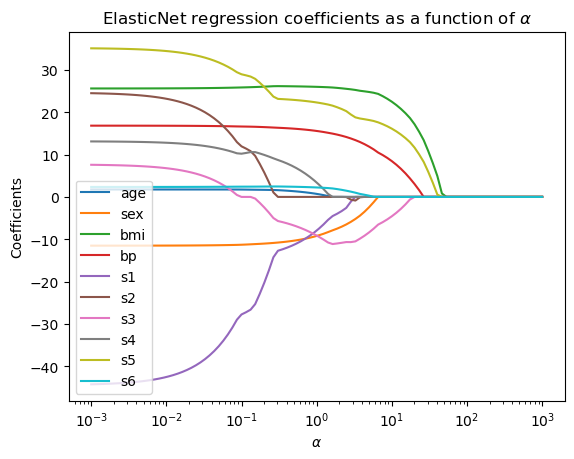

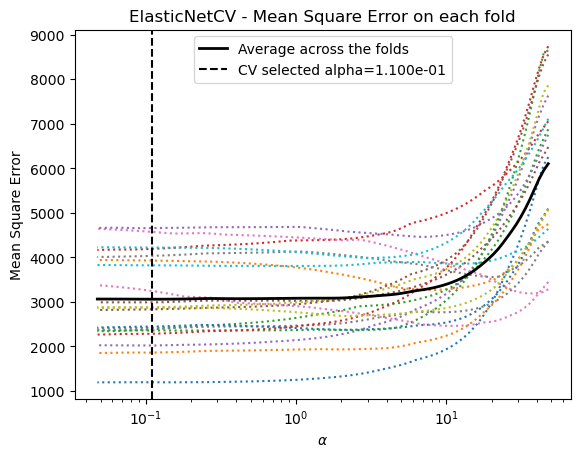

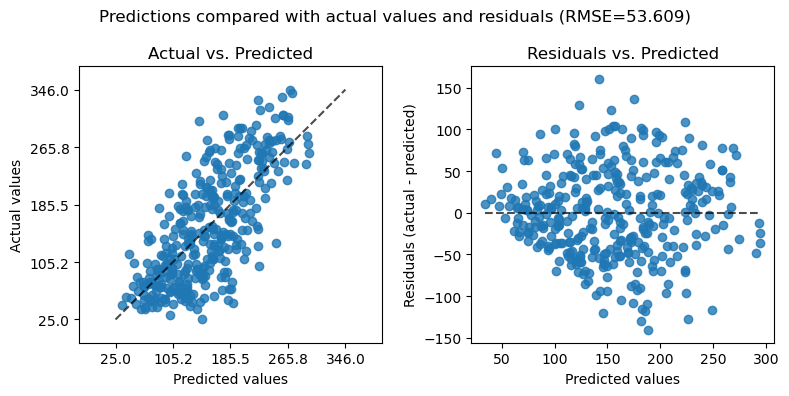

In [3]:
from stepAIC import elastic
train_model, train_output = elastic(X_train, y_train)

## Test the model with the testing data subset

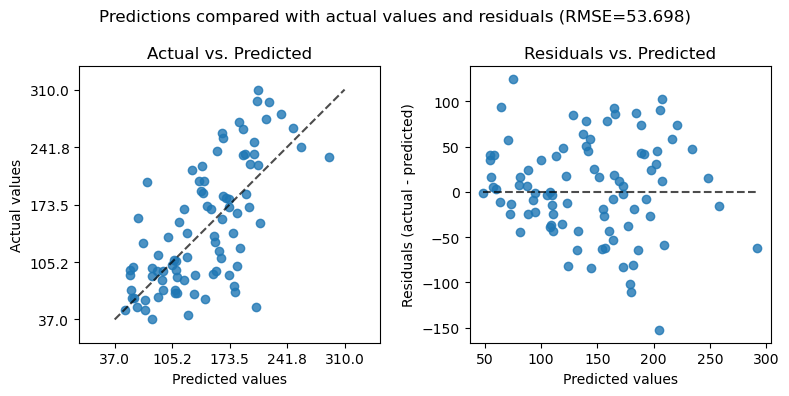

In [6]:
from stepAIC import plot_predictions_from_test
fig = plot_predictions_from_test(
    train_model['ElasticNetCV'], X_test, y_test, scaler=train_output['scaler'])
fig.savefig("ElasticNetCV_predictions_test.png", dpi=300)

## Final fit of the model using all of the X and y data

Fitting Elastic Net regression models, please wait ...


ElasticNetCV regression statistics of best model in model_outputs['stats']:


| Statistic          |    ElasticNetCV |
|:-------------------|----------------:|
| alpha              |     1.11865     |
| r-squared          |     0.512957    |
| adjusted r-squared |     0.503959    |
| n_samples          |   442           |
| df residuals       |   434           |
| df model           |     7           |
| F-statistic        |    65.2989      |
| Prob (F-statistic) |     1.11022e-16 |
| RMSE               |    53.7411      |
| Log-Likelihood     | -2388.18        |
| AIC                |  4792.36        |
| BIC                |  4825.09        |
| L1-ratio           |     1           |


Coefficients of best models in model_outputs['popt']:


| Feature   |   ElasticNetCV |
|:----------|---------------:|
| const     |      152.133   |
| age       |       -0       |
| sex       |       -9.11162 |
| bmi       |       24.8066  |
| bp  

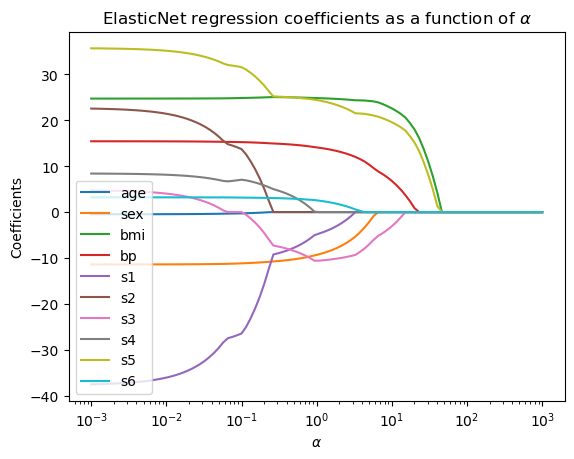

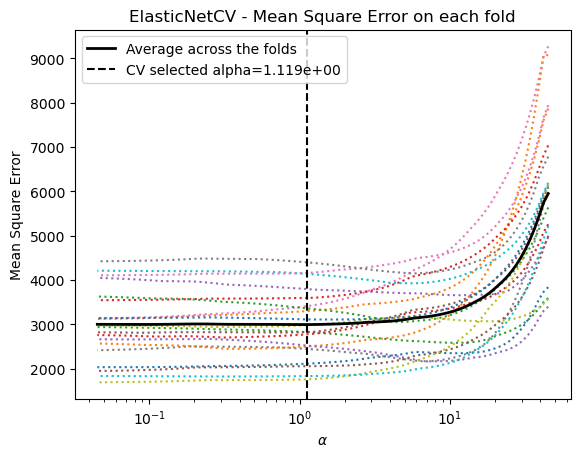

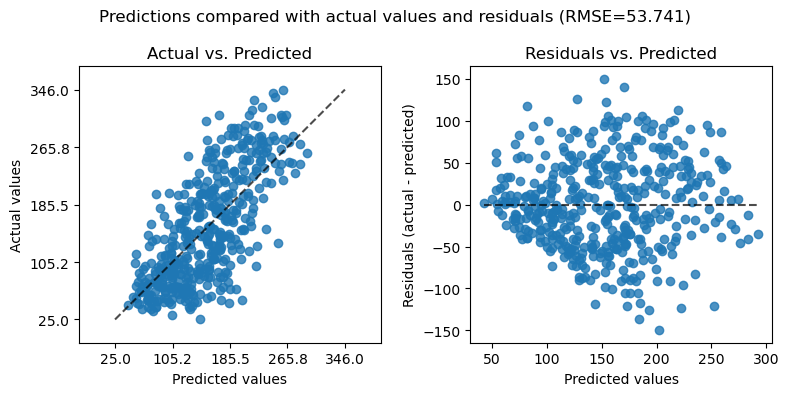

In [7]:
from stepAIC import elastic
final_model, final_output = elastic(X, y)

## User instructions

In [8]:
help(elastic)

Help on function elastic in module stepAIC:

elastic(X, y, **kwargs)
    Python function for ElasticNetCV linear regression

    by
    Greg Pelletier
    gjpelletier@gmail.com
    29-May-2025

    REQUIRED INPUTS (X and y should have same number of rows and
    only contain real numbers)
    X = dataframe of the candidate independent variables
        (as many columns of data as needed)
    y = dataframe of the dependent variable (one column of data)

    OPTIONAL KEYWORD ARGUMENTS
    **kwargs (optional keyword arguments):
        nfolds= number of folds to use for cross-validation (CV)
            (default nfolds=20)
        standardize= 'on' (default) or 'off' where
            'on': standardize X using sklearn.preprocessing StandardScaler
            'off': do not standardize X
        alpha_min= minimum value of range of alphas to evaluate (default=1e-3)
        alpha_max= maximum value of range of alphas to evaluate (default=1e3)
        n_alpha= number of log-spaced alphas to e